<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW5/DEelectoral_HW5_Kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [35]:
!pip install geopandas

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

In [36]:
import geopandas as gpd

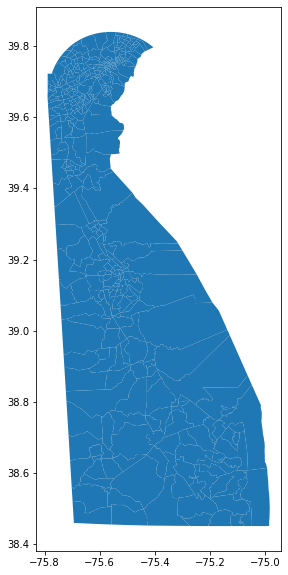

In [37]:
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot(figsize=(5,10))

In [38]:
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


## read in turnout data - keep only election district, and votes


In [39]:
import pandas as pd

In [40]:
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")
turnout = turnout[["election_district", "votes"]]
turnout

,election_district,votes
0,01-01,581
1,01-01,51
2,01-01,5
3,01-01,6
4,02-01,937
...,...,...
4719,07-41,545
4720,08-41,191
4721,08-41,335
4722,Total,3388


## group turnout data by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [41]:
turnout = turnout.groupby("election_district").sum()
turnout

,votes
election_district,
01-01,2519
01-02,3632
01-03,2347
01-04,4676
01-05,3973
...,...
16-04,344
16-31,29
16-41,66


## merge the turnout data with the electoral map


In [42]:
de_elecmap = de_elecp.merge(turnout, left_on="EDRD_2012", right_on="election_district")
de_elecmap

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722
...,...,...,...,...,...,...,...,...
424,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719
425,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202
426,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086
427,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197


# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

In [43]:
import pylab as plt
import numpy as np
import seaborn as sns

In [44]:
de_elecmap["log_pop"] = np.log10(de_elecmap.POPULATION)
de_elecmap["log_votes"] = np.log10(de_elecmap.votes)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


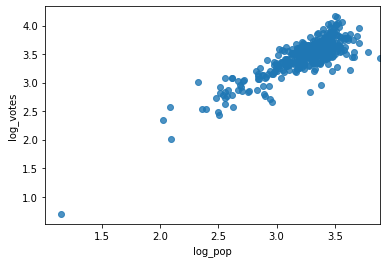

In [45]:
# Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map
sns.regplot(de_elecmap['log_pop'], de_elecmap['log_votes'])
plt.show()

In [46]:
print(de_elecmap["votes"].min())
print(de_elecmap["POPULATION"].min())
print(de_elecmap["log_votes"].min())
print(de_elecmap["log_pop"].min())

0
0
-inf
-inf


In [47]:
de_elecmap["log_votes"] = de_elecmap["log_votes"].clip(0,10)
de_elecmap["log_pop"] = de_elecmap["log_pop"].clip(0,10)

In [48]:
print(de_elecmap["votes"].min())
print(de_elecmap["POPULATION"].min())
print(de_elecmap["log_votes"].min())
print(de_elecmap["log_pop"].min())

0
0
0.0
0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


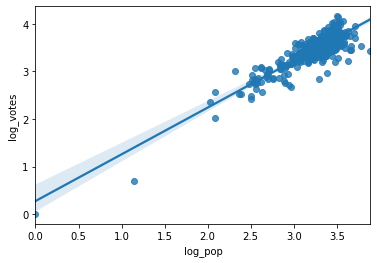

In [49]:
sns.regplot(de_elecmap['log_pop'], de_elecmap['log_votes'])
plt.show()

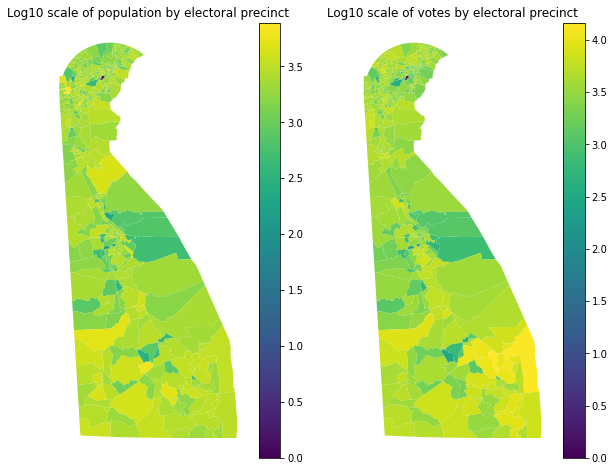

In [50]:
# this is just an option for one of the plot. choose your esthetic and functionality as you see fit
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(121)
de_elecmap.plot(column="log_pop", ax=ax, legend=True)
plt.title("Log10 scale of population by electoral precinct")
ax.axis('off');

ax = fig.add_subplot(122)
de_elecmap.plot(column="log_votes", ax=ax, legend=True)
plt.title("Log10 scale of votes by electoral precinct")
ax.axis('off');

In [51]:
de_elecmap

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,log_pop,log_votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598,3.068557,3.414639
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390,3.244277,3.642465
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690,3.289366,2.838849
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399,3.451479,3.643354
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722,3.888404,3.434888
...,...,...,...,...,...,...,...,...,...,...
424,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719,3.310056,3.673850
425,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202,3.226342,3.342817
426,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086,3.444825,3.319314
427,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197,2.617000,3.078094


In [52]:
# human population density is 50 per km2 (129 per sq. mi.).
de_elecmap["popdensity"] = de_elecmap["POPULATION"] / de_elecmap["votes"]
de_elecmap["log_popden"] = np.log10(de_elecmap.popdensity)
de_elecmap.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,log_pop,log_votes,popdensity,log_popden
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598,3.068557,3.414639,0.450731,-0.346082
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390,3.244277,3.642465,0.399772,-0.398187
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690,3.289366,2.838849,2.821739,0.450517
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399,3.451479,3.643354,0.642873,-0.191875
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722,3.888404,3.434888,2.841293,0.453516


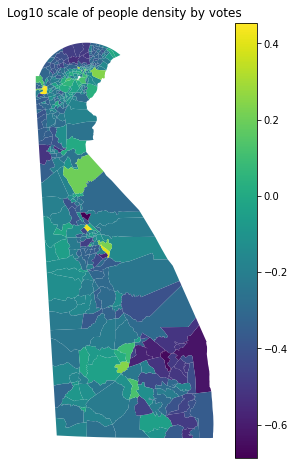

In [53]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(121)
de_elecmap.plot(column="log_popden", ax=ax, legend=True)
plt.title("Log10 scale of people density by votes")
ax.axis('off');

# look at the variables' correlation

In [54]:
import scipy as sp

In [55]:
cols=["OBJECTID", "ID", "POPULATION", "votes", "popdensity"]
de_elecmap_sub = de_elecmap[cols]

In [56]:
de_elecmap_sub.corr()

,OBJECTID,ID,POPULATION,votes,popdensity
OBJECTID,1.000000,0.991589,0.037839,0.178269,-0.085469
ID,0.991589,1.000000,0.036542,0.178375,-0.082993
POPULATION,0.037839,0.036542,1.000000,0.624456,0.228284
votes,0.178269,0.178375,0.624456,1.000000,-0.412315
popdensity,-0.085469,-0.082993,0.228284,-0.412315,1.000000


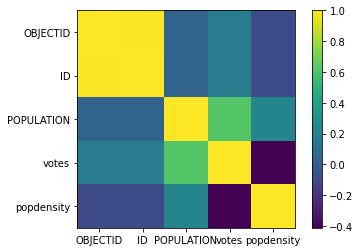

In [57]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(de_elecmap_sub.corr())
plt.xticks(range(len(de_elecmap_sub.corr())), de_elecmap_sub.corr().columns)
plt.yticks(range(len(de_elecmap_sub.corr())), de_elecmap_sub.corr().columns)
plt.colorbar();

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

plot the model over the data

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [58]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# note: if you clean the data differently or do split train and test the result will not be identical

# Let's declare our X and y variables
X = de_elecmap['POPULATION']
y = de_elecmap['votes']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

,const,POPULATION
0,1.0,1171
1,1.0,1755
2,1.0,1947
3,1.0,2828
4,1.0,7734


In [59]:
mod1 = smf.ols(formula='y ~ X', data=de_elecmap)
model1 = mod1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           9.24e-48
Time:                        03:27:30   Log-Likelihood:                -3778.5
No. Observations:                 429   AIC:                             7561.
Df Residuals:                     427   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.9472     91.296      4.917      0.000     269.501     628.393
X[0]         448.9472     91.296      4.917      0.000     269.501     628.393
X[1]           1.3020      0.079     16.521      0.000       1.147       1.457
==============================================================================
Omnibus:                      144.314   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.455
Skew:                           1.206   Prob(JB):                    3.77e-253
Kurtosis:                      10.695   Cond. No.                     9.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
#model1.predict()

In [61]:
mod2 = smf.ols(formula='y ~ I(X**2) + X', 
              data=de_elecmap)
model2 = mod2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           9.99e-60
Time:                        03:27:30   Log-Likelihood:                -3747.7
No. Observations:                 429   AIC:                             7501.
Df Residuals:                     426   BIC:                             7514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -167.8819     80.834     -2.077      0.038    -326.765      -8.999
I(X ** 2)[0]  -167.8819     80.834     -2.077      0.038    -326.765      -8.999
I(X ** 2)[1]    -0.0003   3.64e-05     -8.111      0.000      -0.000      -0.000
X[0]          -167.8819     80.834     -2.077      0.038    -326.765      -8.999
X[1]             2.7284      0.191     14.317      0.000       2.354       3.103
==============================================================================
Omnibus:                      194.221   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.105
Skew:                           1.820   Prob(JB):                    3.98e-284
Kurtosis:                      10.731   Cond. No.                     5.48e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.97e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
model2.compare_lr_test(model1)

(61.606214669798646, 4.194925183501481e-15, 1.0)

In [69]:
# How to avoid overfitting in machine learning?
# cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=302)

In [73]:
# fit to training data
lm = LinearRegression().fit(x_train, y_train, sample_weight=None)

In [80]:
# in sample score
print("linear regression in-sample score: {0}%".format(round(lm.score(x_train, y_train) * 100), 0))

linear regression in-sample score: 37.0%


In [81]:
# out of sample score
print("linear regression out-of-sample score: {0}%".format(round(lm.score(x_test, y_test) * 100), 0))

linear regression out-of-sample score: 42.0%


# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



In [63]:
model1.params

Intercept    448.947153
X[0]         448.947153
X[1]           1.302048
dtype: float64

In [64]:
model1.conf_int()

,0,1
Intercept,269.501480,628.392826
X[0],269.501480,628.392826
X[1],1.147139,1.456957


In [65]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(model1, alpha=0.05)
data.shape

(429, 12)

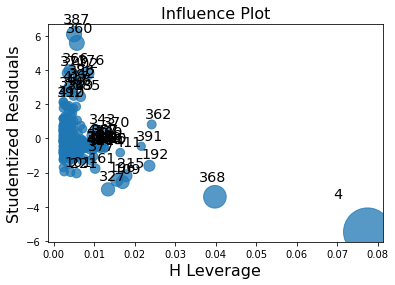

In [66]:
sm.graphics.influence_plot(model1);

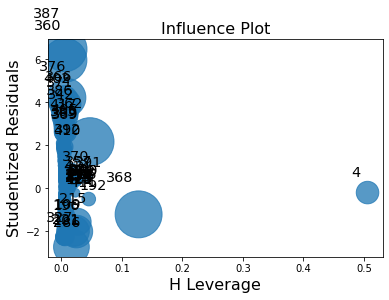

In [67]:
sm.graphics.influence_plot(model2);

# Compare the models with the Likelihood Ration test (follow example in class)


In [68]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the NH is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ration statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this corresponds not being able to reject the NH at alpha 0.05'''.format(*model2.compare_lr_test(model1)))

likelihood ration test - set alpha to alpha=0.05

 the NH is that the more complex model is better than the simpler one

 the likelihood ration statistics is 61.61, which corresponds to a p-value of 0.00

since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (=1 here)
this corresponds not being able to reject the NH at alpha 0.05



# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

## **Model summary:** 

**R squared**

R squared is to find how the model is good. The equation of the R square refers to 1 minus sum of the SSE divided by the sum of variance. If the variance is high, R squared is high. If the variance is low, R squared is low. Increasing the model complexity increases the R2 but does not guarantee a better model.

R squared of the model 1 is 0.39

R squared of the model 2 is 0.472


**Adjusted R squared** 

Adjusted R2 takes into account how many datapoints I have and how many parameters I have

Adjusted R squared of the model 1 is 0.389

Adjusted R squared of the model 2 is 0.469


**P-values for the coeffients**

P > ItI of the model 1 is 0

P > ItI of the model 2 is around 0 and 0.038 (0.038 for X[0] and 0 for X[1])



## **Influence Plot:** 

This function creates a "bubble" plot of studentized residuals versus hat leverage values. The influence plot helps to identify data points that might have strong influence over the model fit. Unusual data points can be unusal because they have an unusual X values (at the edge of the distribution), or because their y value is an "outlier". Points that are both are on the top right of the plot and are high influence points. The influence of the point measured as Cook's distance is represented by the size of the bubble. 

## **Assess the model**

As a result, this model is poor model as result of the cross validation shows the low in-sample scores. Therefore, I can conlude that the more compex model is better. The R suqred of the model 1 and the model 2 is 0.39 and 0.472 respectively, which are regarded as low value. It means the model is not good enough. Increasing the model complexity increases the R2 but does not guarantee a better model.  

# Extra Credit: Collect any other variable about Delaware that you think may be relevant to predit turn out and fit a line model using that as an exogenous variable.

You have a few options here: 
- dig for some other variable that is available at the electoral precinct level 
- get a variable at the county level , which means that the endogenous variable (votes) will be far more granular than the exogenous one... how would you deal with it?
- get a variable at a hith resolution geomeetry, such as census block or census tract, and merge the geometry. This is the hardest option. The Census bureau offers advise on conversion between geometries

Discuss your model: what it means mathematically and what it means in practice
